# Startup-Acquisition-Status-Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
matplotlib.rcParams['figure.figsize'] = (8,5)
pd.set_option('display.max_columns', None)

In [3]:
data_df = pd.read_csv('~/Documents/Internship/Startup-Acquisition-Status-Prediction/data/companies.csv')

# Data Cleaning

### 1. Data Overview

In [4]:
data_df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [5]:
data_df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

> By looking at the info and data types we can clearly see that most of the coluns contains non-unique variety of data which cannot be used in our case.

## 2. Dealing with unnecessary columns
    a. Deleting 'closed_at', 'domain','homepage_url', 'twitter_username', 'logo_url', 'logo_width','logo_height',
        'description' ,'overview','tag_list', 'state_code', 'city', 'region','created_by','created_at', 'updated_at' 
         'short_description', columns as this data contains irrelevant and redundant information

In [7]:
data_df.drop(data_df.columns[:8],axis=1,inplace=True)

In [8]:
data_df.drop(['domain','homepage_url', 'twitter_username', 'logo_url', 'logo_width',
       'logo_height', 'short_description', 'description', 'overview','tag_list', 'state_code', 'city', 'region',
       'created_by','created_at', 'updated_at'],axis=1,inplace=True)

    b. Deleting `closed_at`,`first_investment_at`,`last_investment_at`, `investment_rounds`, `invested_companies` ,`ROI` column 
        as these column contains more than 98% of null values 

In [9]:
print("Percentage of nan values in each columns:")
data_df.isna().mean() * 100

Percentage of nan values in each columns:


category_code          37.326828
status                  0.000000
founded_at             53.586564
closed_at              98.667026
country_code           55.233448
first_investment_at    98.685851
last_investment_at     98.685851
investment_rounds      98.681780
invested_companies     98.681780
first_funding_at       83.970227
last_funding_at        83.970227
funding_rounds         83.868473
funding_total_usd      85.818583
first_milestone_at     53.346426
last_milestone_at      53.346426
milestones             53.346426
relationships          34.029498
lat                    57.338733
lng                    57.338733
ROI                    99.630634
dtype: float64

In [10]:
data_df.drop(['closed_at','first_investment_at','last_investment_at','investment_rounds','invested_companies','ROI'],axis=1,inplace=True)

    c. Deleting duplicate values

In [11]:
data_df.drop(data_df[data_df.duplicated()].index,inplace=True)

## 3.Dealing with missing values and outliers

    a. Droping nan values of 'category_code','status','country_code' & 'founded_at' columns 

In [12]:
data_df.dropna(subset=['category_code','status','country_code','founded_at'],inplace=True)

    b. Removing outliers

In [13]:
data_df.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,22889.000000,2.046700e+04,35244.000000,48295.000000,61211.000000,61211.000000
mean,1.805758,1.582132e+07,1.415929,4.443607,37.294084,-50.715469
std,1.310805,6.990693e+07,0.738596,13.267906,15.813059,70.778579
min,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.485278
25%,1.000000,5.110380e+05,1.000000,1.000000,34.052234,-112.033479
50%,1.000000,2.725875e+06,1.000000,2.000000,39.739236,-75.898684
75%,2.000000,1.200000e+07,2.000000,4.000000,45.420675,1.750318
max,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.165130


- There is great difference in minimum and maximum vaues of `funding_rounds` , `funding_total_usd` & `relationships` columns as their mean and std is so small compared to max. This is due to outlier in the dataset.

> - funding_rounds

In [14]:
data_df[data_df['funding_rounds']>13]

,category_code,status,founded_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
28940,software,operating,2003-02-03,AUS,2003-02-01,2011-12-12,15.0,31594390.0,2009-12-10,2012-10-24,2.0,12.0,-33.868820,151.209295
130591,biotech,operating,2005-01-01,USA,2006-10-24,2013-06-21,14.0,70930000.0,2013-01-01,2013-01-01,1.0,13.0,33.684567,-117.826505
185938,mobile,operating,2008-05-01,ESP,2008-04-01,2013-04-01,15.0,140000.0,2008-05-08,2008-05-08,1.0,3.0,40.416775,-3.703790


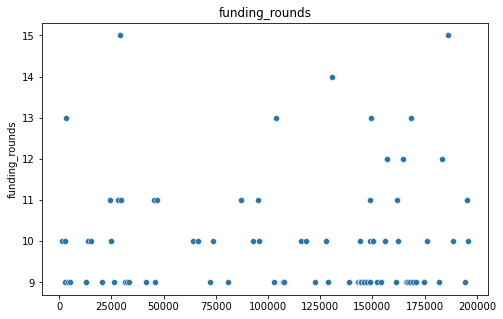

In [15]:
funding_round = data_df[data_df['funding_rounds']>8]['funding_rounds']
plt.title('funding_rounds')
sns.scatterplot(x = funding_round.index, y =funding_round)
plt.show()

> - funding_total_usd

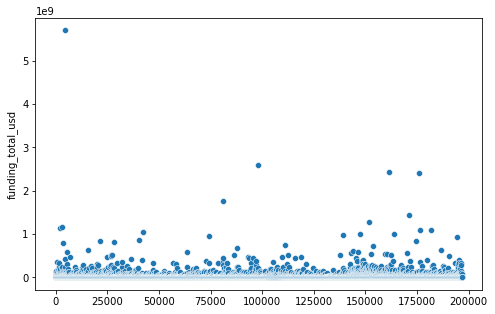

In [16]:
sns.scatterplot(x=data_df.index,y=data_df.funding_total_usd)
plt.show()

We can clearly see outlier data above 2e+9 in the plot. So now removing outliers from both columns as,

In [17]:
funding_usd_outlier = data_df[data_df.funding_total_usd > 2e+09]

In [18]:
data_df.drop(funding_usd_outlier.index,inplace=True)

> - relationships

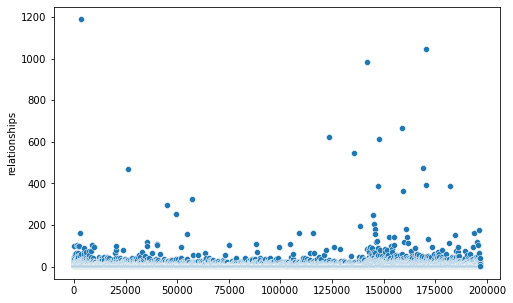

In [19]:
sns.scatterplot(x=data_df.index,y=data_df.relationships)
plt.show()

Here there are three outliers which are above 800 values. So now removing outliers as, 

In [20]:
outlier_relationship = data_df[data_df['relationships'] > 800]

In [21]:
data_df.drop(outlier_relationship.index,axis=0, inplace=True)

In [22]:
data_df.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,22883.000000,2.046100e+04,35238.000000,48288.000000,61204.000000,61204.000000
mean,1.805314,1.518290e+07,1.415517,4.371583,37.293587,-50.708815
std,1.309464,4.920120e+07,0.737546,10.163054,15.813828,70.779537
min,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.485278
25%,1.000000,5.102950e+05,1.000000,1.000000,34.052234,-111.998604
50%,1.000000,2.723900e+06,1.000000,2.000000,39.739236,-75.898684
75%,2.000000,1.200000e+07,2.000000,4.000000,45.420675,1.799756
max,15.000000,1.765504e+09,9.000000,666.000000,77.553604,176.165130


    c. filing nan values with their mean 

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer = SimpleImputer(strategy='mean')

## Exploratory Data Analysis (EDA)

#### Dates conversion

In [16]:
data_df.drop(['closed_at'],axis=1,inplace=True)

> Now changing types of `founded_at` to datatypes

In [19]:
data_df['founded_at'] = pd.to_datetime(data_df['founded_at'],format="%Y-%m-%d")

In [45]:
data_df['founded_at'] = data_df['founded_at'].fillna(method='bfill').fillna(method='pad')